In [55]:
import pandas as pd
import numpy as np

%matplotlib inline

In [56]:
%run f2forecast.py

In [57]:
df=pd.read_excel("DAT.xlsx")
df.head()

,t,Потребл.эн,Ставка
0,1,13.176,1526.41
1,2,15.408,1529.32
2,3,19.488,1528.81
3,4,19.176,1535.78
4,5,19.176,1540.92


In [58]:
#NewCons = []
#NewStav = []
#flag = 0
#for i in range(len(df["Ставка"])):
    #if (i==flag):
       # NewCons.append(df['Потребл.эн'][i])
        #NewStav.append(df['Ставка'][i])
        #flag += 2
#print(len(NewCons))

In [59]:
Cons = []
Stav = []
for i in range(len(df["Ставка"])):
    Cons.append(df['Потребл.эн'][i])
    Stav.append(df['Ставка'][i])

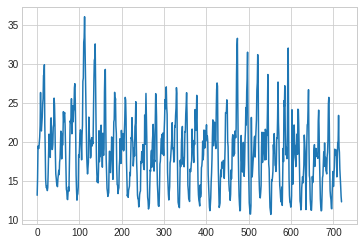

In [60]:
plt.plot(Cons)

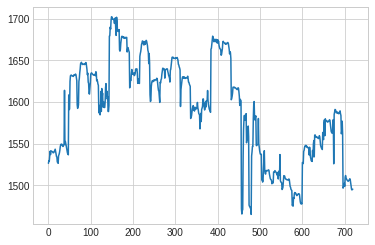

In [61]:
plt.plot(Stav)

In [62]:
df['Потребл.эн'].describe()

count    720.000000
mean      18.694600
std        4.498866
min       10.728000
25%       15.480000
50%       18.372000
75%       21.300000
max       36.024000
Name: Потребл.эн, dtype: float64

In [63]:
df['Ставка'].describe()

count     720.000000
mean     1591.331639
std        59.613754
min      1465.100000
25%      1541.742500
50%      1594.680000
75%      1635.797500
max      1702.300000
Name: Ставка, dtype: float64

Text(0.5, 0.98, 'Мультипликативная модель')

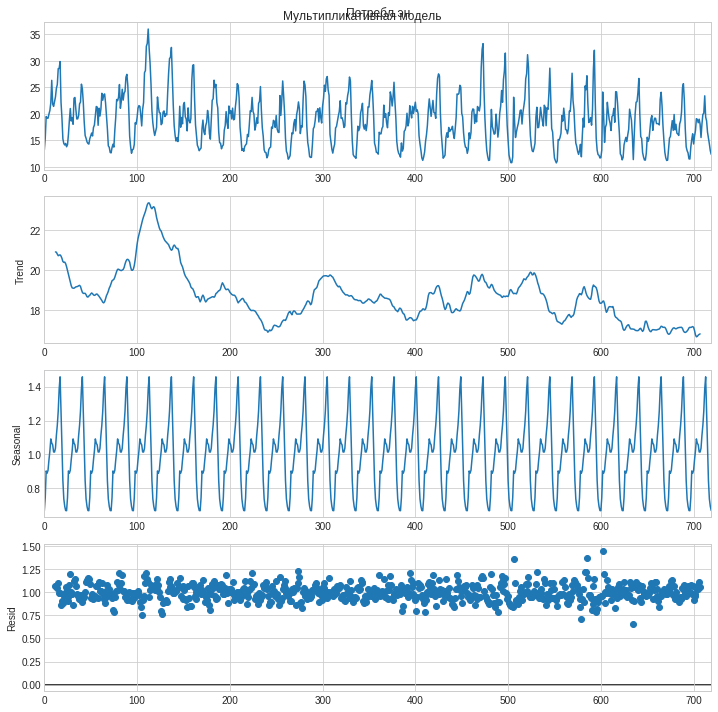

In [64]:
# декомпозиция 
result_M = seasonal_decompose(df['Потребл.эн'], model='multiplicative', freq=24)

# Построение графика
plt.rcParams.update({'figure.figsize': (10,10)})
result_M.plot().suptitle('Мультипликативная модель')

In [65]:
result_M.seasonal

0      0.668828
1      0.746721
2      0.902960
3      0.889624
4      0.907202
5      0.968434
6      1.020691
7      1.091777
8      1.067083
9      1.056820
10     1.014893
11     1.014296
12     1.036612
13     1.112512
14     1.172620
15     1.256512
16     1.385629
17     1.457392
18     1.249903
19     1.029766
20     0.846447
21     0.738724
22     0.694609
23     0.669943
24     0.668828
25     0.746721
26     0.902960
27     0.889624
28     0.907202
29     0.968434
         ...   
690    1.249903
691    1.029766
692    0.846447
693    0.738724
694    0.694609
695    0.669943
696    0.668828
697    0.746721
698    0.902960
699    0.889624
700    0.907202
701    0.968434
702    1.020691
703    1.091777
704    1.067083
705    1.056820
706    1.014893
707    1.014296
708    1.036612
709    1.112512
710    1.172620
711    1.256512
712    1.385629
713    1.457392
714    1.249903
715    1.029766
716    0.846447
717    0.738724
718    0.694609
719    0.669943
Name: seasonal, Length: 

In [66]:
result_M.trend

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6          NaN
7          NaN
8          NaN
9          NaN
10         NaN
11         NaN
12     20.8935
13     20.8800
14     20.7835
15     20.7045
16     20.7340
17     20.7445
18     20.6875
19     20.5725
20     20.4165
21     20.3720
22     20.3855
23     20.3060
24     20.1530
25     19.9605
26     19.7780
27     19.5705
28     19.3770
29     19.2075
        ...   
690    16.8875
691    16.8695
692    16.8945
693    16.9420
694    17.0030
695    17.0970
696    17.1280
697    17.1190
698    17.1430
699    17.1630
700    17.1275
701    16.9655
702    16.7510
703    16.6535
704    16.6745
705    16.7365
706    16.7715
707    16.7975
708        NaN
709        NaN
710        NaN
711        NaN
712        NaN
713        NaN
714        NaN
715        NaN
716        NaN
717        NaN
718        NaN
719        NaN
Name: trend, Length: 720, dtype: float64

Text(0.5, 0.98, 'Адитивная модель')

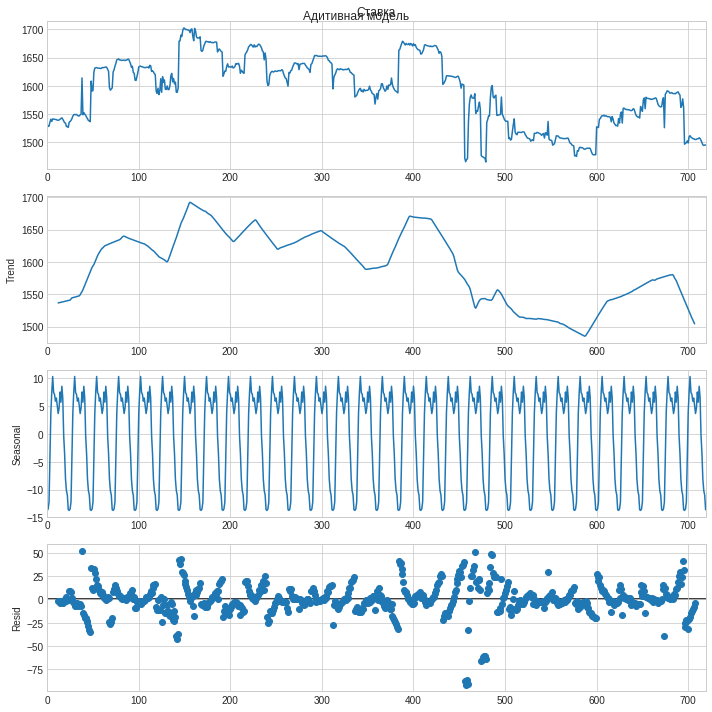

In [67]:
# Decompose 
result_A = seasonal_decompose(df['Ставка'], model='additive', freq=24)

# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
result_A.plot().suptitle('Адитивная модель')

In [68]:
result_A.seasonal

0     -13.735276
1     -13.492266
2     -12.223638
3      -4.366016
4       3.846089
5       7.556800
6      10.344710
7       7.467576
8       7.144739
9       5.910529
10      6.473115
11      5.016039
12      3.683726
13      4.667612
14      7.557160
15      5.730242
16      8.587907
17      6.453884
18     -0.269069
19     -3.484105
20     -8.100304
21    -10.182043
22    -10.973932
23    -13.613480
24    -13.735276
25    -13.492266
26    -12.223638
27     -4.366016
28      3.846089
29      7.556800
         ...    
690    -0.269069
691    -3.484105
692    -8.100304
693   -10.182043
694   -10.973932
695   -13.613480
696   -13.735276
697   -13.492266
698   -12.223638
699    -4.366016
700     3.846089
701     7.556800
702    10.344710
703     7.467576
704     7.144739
705     5.910529
706     6.473115
707     5.016039
708     3.683726
709     4.667612
710     7.557160
711     5.730242
712     8.587907
713     6.453884
714    -0.269069
715    -3.484105
716    -8.100304
717   -10.1820

In [69]:
result_A.trend

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
5              NaN
6              NaN
7              NaN
8              NaN
9              NaN
10             NaN
11             NaN
12     1536.683125
13     1537.029792
14     1537.395208
15     1537.734167
16     1537.976875
17     1538.334375
18     1538.743958
19     1539.074375
20     1539.419583
21     1539.752500
22     1540.039167
23     1540.332292
24     1540.688333
25     1541.102083
26     1542.844375
27     1544.509792
28     1544.841875
29     1545.227500
          ...     
690    1560.582708
691    1557.266042
692    1553.942708
693    1550.611250
694    1547.223958
695    1543.826667
696    1540.435417
697    1537.047500
698    1533.703125
699    1530.353958
700    1526.982917
701    1523.581458
702    1520.140417
703    1516.665208
704    1513.528125
705    1510.677500
706    1507.501250
707    1504.406458
708            NaN
709            NaN
710            NaN
711         

In [70]:
import pyEX as pticker 

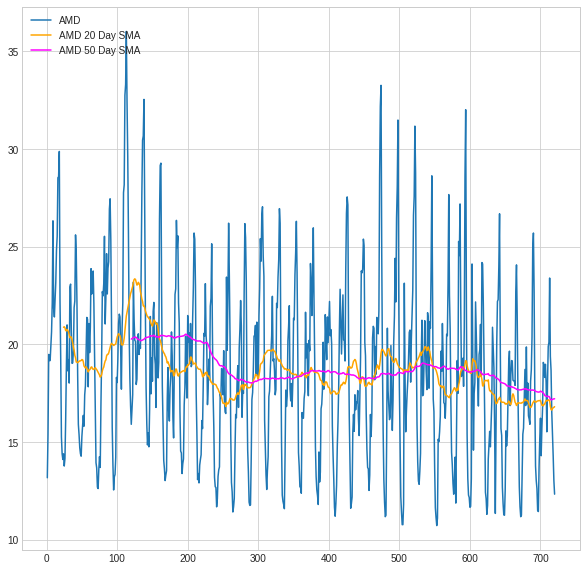

In [71]:
#https://www.machinelearningmastery.ru/implementing-moving-averages-in-python-1ad28e636f9d/
df.columns=['ds','y','z']
rolling_mean = df.y.rolling(window=24).mean()
rolling_mean2 = df.y.rolling(window=120).mean()
plt.plot(df.ds, df.y, label='AMD')
plt.plot(df.ds, rolling_mean, label='AMD 20 Day SMA', color='orange')
plt.plot(df.ds, rolling_mean2, label='AMD 50 Day SMA', color='magenta')
plt.legend(loc='upper left')
plt.show()

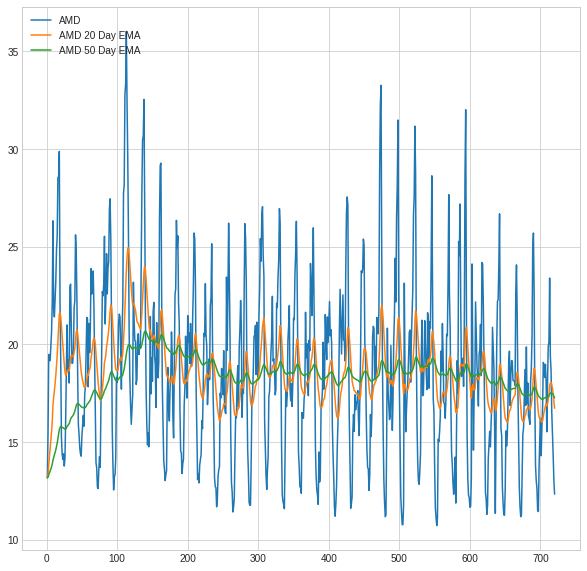

In [72]:
exp1 = df.y.ewm(span=24, adjust=False).mean()
exp2 = df.y.ewm(span=120, adjust=False).mean()
plt.plot(df.ds, df.y, label='AMD')
plt.plot(df.ds, exp1, label='AMD 20 Day EMA')
plt.plot(df.ds, exp2, label='AMD 50 Day EMA')
plt.legend(loc='upper left')
plt.show()

In [96]:
train=df.y
train.head()

0    13.176
1    15.408
2    19.488
3    19.176
4    19.176
Name: y, dtype: float64

In [97]:
test=df.y
test.head()

0    13.176
1    15.408
2    19.488
3    19.176
4    19.176
Name: y, dtype: float64

In [98]:
fit1 = ExponentialSmoothing(train, seasonal_periods=24, trend='add', seasonal='mul').fit()

In [99]:
fit1.params

{'smoothing_level': 0.6210659702469317,
 'smoothing_slope': 3.724836278758097e-15,
 'smoothing_seasonal': 3.486165281115267e-14,
 'damping_slope': nan,
 'initial_level': 12.364100334965853,
 'initial_slope': 0.0037152400672514733,
 'initial_seasons': array([1.10058821, 1.22789463, 1.49316783, 1.46729412, 1.48478076,
        1.57704782, 1.66235665, 1.77434306, 1.74772125, 1.72572911,
        1.6515806 , 1.65864414, 1.68782514, 1.81122169, 1.9186924 ,
        2.05169839, 2.25426172, 2.34997991, 2.01484204, 1.66245873,
        1.36939356, 1.20327016, 1.13412603, 1.09895374]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [100]:
fit1.fittedvalues

0      13.611872
1      14.888918
2      18.503085
3      18.789011
4      19.261658
5      20.407967
6      21.230062
7      22.275685
8      21.857613
9      24.330452
10     21.810917
11     21.659053
12     22.418588
13     24.574461
14     26.198653
15     27.582316
16     30.964660
17     30.746854
18     25.907842
19     19.482832
20     15.933269
21     13.639612
22     13.305160
23     13.382174
24     14.039244
25     15.485340
26     17.835375
27     16.475109
28     18.117977
29     21.150877
         ...    
690    21.784378
691    18.427261
692    14.572440
693    12.374468
694    12.052505
695    12.026736
696    11.718600
697    12.891167
698    16.313720
699    15.337249
700    16.082843
701    15.914688
702    16.670010
703    17.885766
704    18.354475
705    18.501265
706    17.599971
707    18.544655
708    18.563305
709    17.904248
710    19.084110
711    20.953857
712    22.456528
713    24.029624
714    18.140665
715    15.246432
716    13.223535
717    12.8552

In [101]:
fit1.forecast(168)

720    12.461935
721    13.907985
722    16.918200
723    16.630492
724    16.834204
725    17.886172
726    18.859883
727    20.136991
728    19.841354
729    19.598095
730    18.762170
731    18.848575
732    19.186454
733    20.595901
734    21.825108
735    23.345673
736    25.658956
737    26.757192
738    22.948752
739    18.941335
740    15.607365
741    13.718480
742    12.934381
743    12.537334
744    12.560070
745    14.017471
746    17.051340
747    16.761324
748    16.966596
749    18.026791
         ...    
858    23.847026
859    19.682507
860    16.217880
861    14.254932
862    13.440007
863    13.027280
864    13.050744
865    14.564902
866    17.717037
867    17.415486
868    17.628554
869    18.729884
870    19.749235
871    21.086255
872    20.776375
873    20.521351
874    19.645757
875    19.735940
876    20.089431
877    21.564894
878    22.851598
879    24.443320
880    26.864974
881    28.014418
882    24.026681
883    19.830741
884    16.339983
885    14.3622

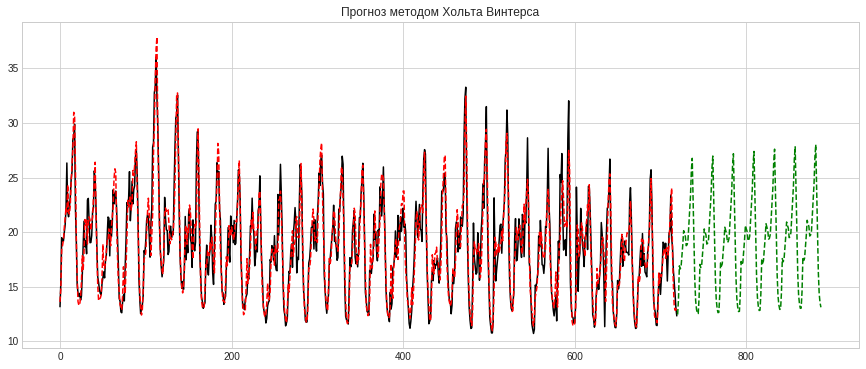

In [102]:
ax = df.y.plot(figsize=(15,6), color='black', title="Прогноз методом Хольта Винтерса" )
fit1.fittedvalues.plot(ax=ax, style='--', color='red')
fit1.forecast(168).plot(ax=ax, style='--', color='green')
plt.show()

In [103]:
metrics(train, fit1.fittedvalues)

Тест на стационарность:
	T-статистика = -15.907
	P-значение = 0.000
Критические значения :
	1%: -3.4395677423210493 - Данные  стационарны с вероятностью 99% процентов
	5%: -2.8656078730509784 - Данные  стационарны с вероятностью 95% процентов
	10%: -2.5689362152032573 - Данные  стационарны с вероятностью 90% процентов
MAD: 1.3502
MSE: 3.2457
MAPE: 0.0711
MPE: -0.0066
Стандартная ошибка: 1.8016


In [104]:
metrics(test, fit1.forecast(len(test)))

Тест на стационарность:


MissingDataError: exog contains inf or nans

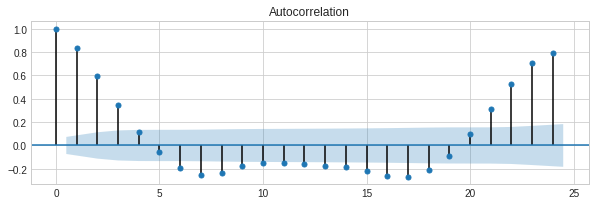

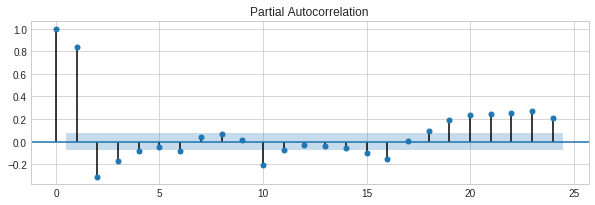

In [107]:
plt.rcParams.update({'figure.figsize': (10,3)})
plot_acf(train, lags=24)
plot_pacf(train, lags=24)
plt.show()

In [108]:
model = auto_arima(train, seasonal=True, m=24, trace=True, suppress_warnings=True, error_action='ignore', stepwise=True,trend="t")
model

Performing stepwise search to minimize aic
Fit ARIMA(2,1,2)x(1,0,1,24) [intercept=True]; AIC=3147.134, BIC=3183.757, Time=20.493 seconds
Fit ARIMA(0,1,0)x(0,0,0,24) [intercept=True]; AIC=3411.603, BIC=3420.759, Time=0.359 seconds
Fit ARIMA(1,1,0)x(1,0,0,24) [intercept=True]; AIC=3219.315, BIC=3237.626, Time=10.605 seconds
Fit ARIMA(0,1,1)x(0,0,1,24) [intercept=True]; AIC=3305.862, BIC=3324.173, Time=8.421 seconds
Fit ARIMA(0,1,0)x(0,0,0,24) [intercept=False]; AIC=3411.603, BIC=3420.759, Time=0.246 seconds
Fit ARIMA(2,1,2)x(0,0,1,24) [intercept=True]; AIC=3244.414, BIC=3276.459, Time=32.228 seconds
Fit ARIMA(2,1,2)x(1,0,0,24) [intercept=True]; AIC=3186.514, BIC=3218.559, Time=20.383 seconds
Fit ARIMA(2,1,2)x(2,0,1,24) [intercept=True]; AIC=3010.106, BIC=3051.306, Time=159.721 seconds
Fit ARIMA(2,1,2)x(2,0,0,24) [intercept=True]; AIC=3078.682, BIC=3115.305, Time=111.347 seconds
Fit ARIMA(2,1,2)x(2,0,2,24) [intercept=True]; AIC=3137.258, BIC=3183.036, Time=63.150 seconds
Fit ARIMA(2,1,2)x

ARIMA(maxiter=50, method='lbfgs', order=(2, 1, 2), out_of_sample_size=0,
      scoring='mse', scoring_args=None, seasonal_order=(2, 0, 1, 24),
      start_params=None, suppress_warnings=True, trend='t',
      with_intercept=True)

In [109]:
mod = sm.tsa.statespace.SARIMAX(train,
                                order=(2, 1, 2),
                                seasonal_order=(2, 0, 1, 24))

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2940      0.056     -5.276      0.000      -0.403      -0.185
ar.L2          0.6057      0.042     14.587      0.000       0.524       0.687
ma.L1         -0.0396      0.110     -0.359      0.720      -0.256       0.177
ma.L2         -0.9601      0.034    -27.974      0.000      -1.027      -0.893
ar.S.L24       1.0471      0.040     26.022      0.000       0.968       1.126
ar.S.L48      -0.0543      0.039     -1.403      0.161      -0.130       0.022
ma.S.L24      -0.8704      0.033    -26.169      0.000      -0.936      -0.805
sigma2         3.1610      0.228     13.893      0.000       2.715       3.607


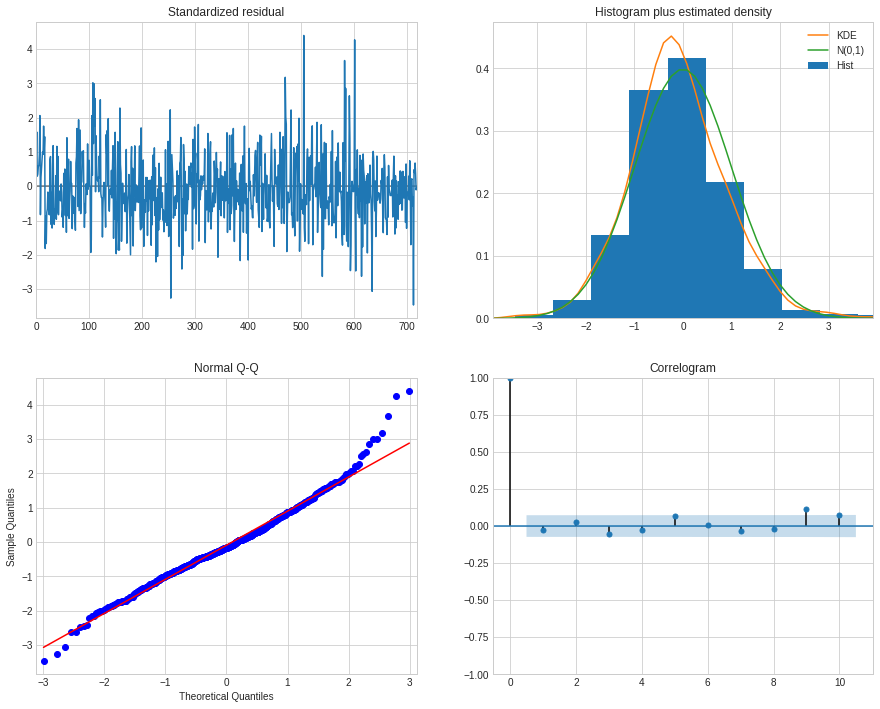

In [110]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [119]:
predict=results.get_prediction()
predict.predicted_mean[:900]

0       0.000000
1      13.175984
2      15.065509
3      18.365565
4      18.209583
5      18.383734
6      19.021025
7      19.644417
8      20.811954
9      24.046470
10     20.707066
11     20.824885
12     21.139951
13     22.179893
14     23.084962
15     23.931254
16     25.875887
17     26.105770
18     26.939972
19     21.484432
20     19.593448
21     16.358930
22     15.801283
23     14.813411
24     14.644843
25     15.849887
26     17.823372
27     17.144067
28     19.207093
29     20.946620
         ...    
690    21.918536
691    18.471328
692    14.992104
693    12.260800
694    12.440085
695    12.106508
696    11.780685
697    13.229449
698    17.042614
699    15.069671
700    16.482960
701    16.280931
702    17.101481
703    19.314444
704    18.437335
705    19.015394
706    17.662382
707    18.261226
708    18.556558
709    17.740195
710    19.508132
711    21.137082
712    23.960384
713    25.544895
714    17.817301
715    15.832626
716    14.276663
717    13.6630

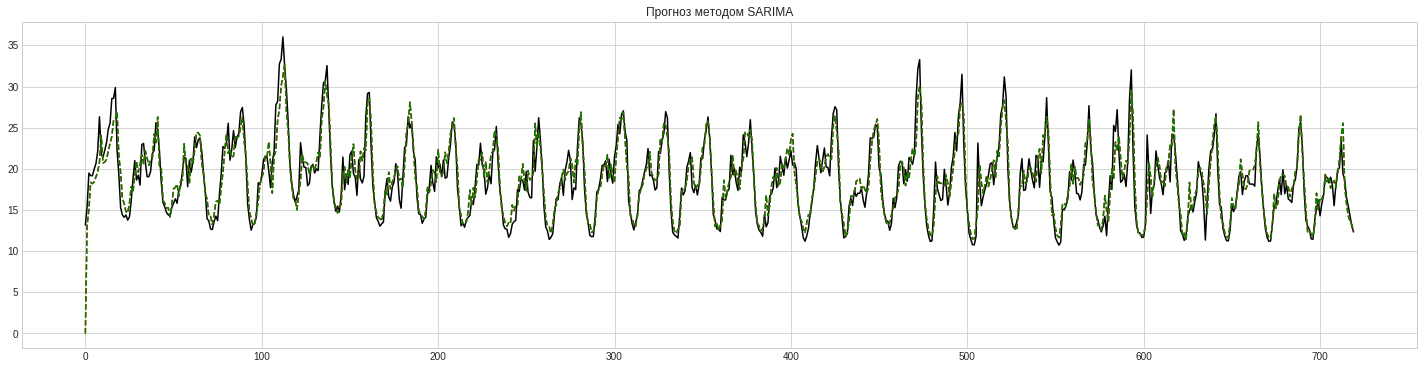

In [122]:

ax = df.y.plot(figsize=(25,6), color='black', title="Прогноз методом SARIMA" )
results.fittedvalues.plot(ax=ax, style='--', color='red')
predict.predicted_mean.plot(ax=ax, style='--', color='green')
plt.show()

In [121]:
metrics(test, predict.predicted_mean)

Тест на стационарность:
	T-статистика = -6.403
	P-значение = 0.000
Критические значения :
	1%: -3.439620010600208 - Данные  стационарны с вероятностью 99% процентов
	5%: -2.8656309041017756 - Данные  стационарны с вероятностью 95% процентов
	10%: -2.5689484851894413 - Данные  стационарны с вероятностью 90% процентов
MAD: 1.4277
MSE: 3.6216
MAPE: 0.0763
MPE: -0.0166
Стандартная ошибка: 1.903
